# 5 Years of Crime Incidents
Cleaned by: Raymond Arevalo

In [222]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.io as io
import scipy.signal as sig
import math as math
import random 
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.style.use('seaborn-colorblind')
plt.rcParams['image.cmap'] = 'RdBu'

In [223]:
import matplotlib.pyplot as plt
import h5py

# Loading files

In [224]:
dfIncidents = pd.read_csv('../incidents-5y.csv')
dfcode = pd.read_csv('nbrhcodes.csv')
dfzip = pd.read_csv('area_zip_dict.csv')

# Examining Data

In [225]:
# Examine Incidents data
print(dfIncidents.head(5))

   id        date  year  month   day  week  dow      time  hour  is_night  \
0 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
1 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
2 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
3 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   
4 NaN  2008-01-01  2008      1  2922     0    2  00:00:00     0         1   

     ...     comm_pop council council_pop  asr_zone lampdist        lat  \
0    ...            0    NONE           0       NaN      NaN  33.137756   
1    ...            0    NONE           0       NaN      NaN  32.630291   
2    ...            0    NONE           0       NaN      NaN  33.193405   
3    ...            0    NONE           0       NaN      NaN  32.655955   
4    ...            0    NONE           0       NaN      NaN  32.626110   

          lon         desc       gctype  gcquality  
0 -117.266499  PETTY THEFT  cns/s

In [226]:
# Examine Incidents data
print(dfcode.head(5))

           type      city    code  scode                   name         lon  \
0  neighborhood  CaSanSAN  SanADM    103            Adams North -117.119183   
1  neighborhood  CaSanSAN  SanALL     51         Allied Gardens -117.081694   
2  neighborhood  CaSanSAN  SanALT    119             Alta Vista -117.065998   
3  neighborhood  CaSanSAN  SanAZL     12  Azalea/Hollywood Park -117.104734   
4  neighborhood  CaSanSAN  SanBAL     89            Balboa Park -117.145920   

         lat          area  
0  32.768792  2.115885e+07  
1  32.797943  6.459816e+07  
2  32.693359  7.690619e+06  
3  32.732939  9.612716e+06  
4  32.731088  5.686434e+07  


In [227]:
# Examine Incidents data
print(dfzip.head(5))

            Area       Zipcode
0          Jamul        91935 
1    Wooded_Area        92106 
2       Old_Town        92110 
3  Spring_Valley  91977 91978 
4   Pauma_Valley        92061 


# Cleaning Data

In [228]:
# Grabs necessary crime data (year, type, neighborhood)
dfIncidents = dfIncidents[['year', 'type', 'city', 'comm_pop']]

In [229]:
dfIncidents.head(5)

,year,type,city,comm_pop
0,2008,THEFT/LARCENY,SndCAR,0
1,2008,FRAUD,SndCHU,0
2,2008,FRAUD,SndOCN,0
3,2008,FRAUD,SndCHU,0
4,2008,FRAUD,SndCHU,0


In [230]:
# Grabs neighborhood codes
#dfcode = dfcode[['code','name']]
#print(dfcode[dfcode.code == 'SanLEM'])

In [231]:
# Replaces city codes in dfIncidents with city names
#for i in range(len(dfcode)):
#    name = dfcode['name'][i]
#    key_code = dfcode['code'][i]
#    
#    dfIncidents.replace(to_replace = key_code, value = name, inplace=True)

dfIncidents.replace(to_replace='SndOCN', value = 'Oceanside', inplace = True)
dfIncidents.replace(to_replace='SndCHU', value = 'Chula_Vista', inplace = True)
dfIncidents.replace(to_replace='SndESC', value = 'Escondido', inplace = True)
dfIncidents.replace(to_replace='SndVIS', value = 'Vista', inplace = True)
dfIncidents.replace(to_replace='SndCAR', value = 'Carlsbad', inplace = True)
dfIncidents.replace(to_replace='SndLAM', value = 'La_Mesa', inplace = True)
dfIncidents.replace(to_replace='SndELC', value = 'El_Cajon', inplace = True)
dfIncidents.replace(to_replace='SndNAT', value = 'National_City', inplace = True)
dfIncidents.replace(to_replace='SndSNM', value = 'San_Marcos', inplace = True)
dfIncidents.replace(to_replace='SndSNT', value = 'Santee', inplace = True)
dfIncidents.replace(to_replace='SndENC', value = 'Encinitas', inplace = True)
dfIncidents.replace(to_replace='SndPOW', value = 'Poway', inplace = True)
dfIncidents.replace(to_replace='SndIMP', value = 'Imperial_Beach', inplace = True)
dfIncidents.replace(to_replace='SndDEL', value = 'Del_Mar', inplace = True)
dfIncidents.replace(to_replace='SndLEM', value = 'Lemon_Grove', inplace = True)
dfIncidents.replace(to_replace='SndCOR', value = 'Coronado', inplace = True)
dfIncidents.replace(to_replace='SndSOL', value = 'Solana_Beach', inplace = True)



In [232]:
# Replace spaces with '_' in neighborhood names
#dfIncidents['nbrhood'] = [str(x.replace(" ","_")) for x in dfIncidents['nbrhood'][:]]

In [233]:
# Remove rows where neighborhood is not available
#dfIncidents = dfIncidents[(dfIncidents.nbrhood != 'NONE')]

print(dfIncidents)

        year                      type           city  comm_pop
0       2008             THEFT/LARCENY       Carlsbad         0
1       2008                     FRAUD    Chula_Vista         0
2       2008                     FRAUD      Oceanside         0
3       2008                     FRAUD    Chula_Vista         0
4       2008                     FRAUD    Chula_Vista         0
5       2008                   ASSAULT       El_Cajon         0
6       2008                SEX CRIMES       El_Cajon         0
7       2008                SEX CRIMES       El_Cajon         0
8       2008                     FRAUD        La_Mesa         0
9       2008                   ASSAULT      Oceanside         0
10      2008                     FRAUD      Oceanside         0
11      2008                     FRAUD      Oceanside         0
12      2008                     FRAUD      Oceanside         0
13      2008                     FRAUD      Oceanside         0
14      2008                     FRAUD  

In [234]:
# Remove neighborhoods in for which we don't have the zipcode data for
area = dfzip['Area'].values
dfIncidents = dfIncidents[dfIncidents['city'].isin(area)]

In [235]:
# Reset index of dfIncidents
dfIncidents = dfIncidents.reset_index()
del dfIncidents['index']

In [236]:
# Examine Data again
dfIncidents.head(5)

,year,type,city,comm_pop
0,2008,THEFT/LARCENY,Carlsbad,0
1,2008,FRAUD,Chula_Vista,0
2,2008,FRAUD,Oceanside,0
3,2008,FRAUD,Chula_Vista,0
4,2008,FRAUD,Chula_Vista,0


# Create new dataframe

In [264]:
# Sort values and group data by year and neighorhood to get total crimecount
dfIncidents = dfIncidents.sort_values(['year', 'city'], ascending=[True, True])
dfgroup = dfIncidents.groupby(["year", "city"]).size()


# Take series and convert to dataframe. Reset index and rename columns
dfsort = dfgroup.to_frame()
dfsort = dfsort.reset_index()
dfsort.columns = ['year', 'city', 'crimecount']

In [265]:
print(dfsort[dfsort.year == 2008])

    year            city  crimecount
0   2008        Carlsbad        4086
1   2008     Chula_Vista       11607
2   2008        Coronado        1237
3   2008         Del_Mar         614
4   2008        El_Cajon        5922
5   2008       Encinitas        2424
6   2008       Escondido        7850
7   2008  Imperial_Beach        1550
8   2008         La_Mesa        3442
9   2008     Lemon_Grove        1409
10  2008   National_City        4216
11  2008       Oceanside       10483
12  2008           Poway        1666
13  2008      San_Marcos        2890
14  2008          Santee        2401
15  2008    Solana_Beach         579
16  2008           Vista        5426


# Cleaning new data frame

In [266]:
columns = ['year', 'crimecount','zipcode']
dfNew = pd.DataFrame(columns=columns) 


# Appends a new column that contains zip codes of each neighborhood
zips = []
for i in range(len(dfsort['city'])):
    name = dfsort['city'][i]
    for j in range(len(dfzip['Zipcode'])):
        area = dfzip['Area'][j]
        zipcode = dfzip['Zipcode'][j]
        if name == area:
            
            # For the zip codes
            zipcode = zipcode.split(' ')
            zipcode.pop()
            #zips.extend(zipcode)
            for x in zipcode:
                dfNew.loc[len(dfNew)]=[int(dfsort['year'][i]), int(dfsort['crimecount'][i]), x] 


In [267]:
#dfsort['zipcode'] = pd.Series(zips, index = dfsort.index)

In [268]:
#print(dfsort[dfsort.crimecount == 4086].zipcode)

In [269]:
# Detach neighborhood column
#del dfsort['nbrhood']

In [271]:
dfsort = dfsort.sort_values(['city', 'year'],ascending = [True, True])
print(dfsort)

    year          city  crimecount
0   2008      Carlsbad        4086
17  2009      Carlsbad        3418
34  2010      Carlsbad        3395
51  2011      Carlsbad        3445
68  2012      Carlsbad        3797
1   2008   Chula_Vista       11607
18  2009   Chula_Vista       10132
35  2010   Chula_Vista        9433
52  2011   Chula_Vista        9210
69  2012   Chula_Vista        8545
2   2008      Coronado        1237
19  2009      Coronado        1074
36  2010      Coronado         856
53  2011      Coronado         862
70  2012      Coronado         893
3   2008       Del_Mar         614
20  2009       Del_Mar         587
37  2010       Del_Mar         522
54  2011       Del_Mar         492
71  2012       Del_Mar         455
4   2008      El_Cajon        5922
21  2009      El_Cajon        5489
38  2010      El_Cajon        5667
55  2011      El_Cajon        4873
72  2012      El_Cajon        4354
5   2008     Encinitas        2424
22  2009     Encinitas        2150
39  2010     Encinit

In [272]:
# sort by zipcode
dfNew = dfNew.sort_values(['zipcode', 'year'],ascending = [True, True])
print(dfNew)

       year  crimecount zipcode
4    2008.0     11607.0   91910
40   2009.0     10132.0   91910
76   2010.0      9433.0   91910
112  2011.0      9210.0   91910
148  2012.0      8545.0   91910
5    2008.0     11607.0   91911
41   2009.0     10132.0   91911
77   2010.0      9433.0   91911
113  2011.0      9210.0   91911
149  2012.0      8545.0   91911
6    2008.0     11607.0   91913
42   2009.0     10132.0   91913
78   2010.0      9433.0   91913
114  2011.0      9210.0   91913
150  2012.0      8545.0   91913
7    2008.0     11607.0   91914
43   2009.0     10132.0   91914
79   2010.0      9433.0   91914
115  2011.0      9210.0   91914
151  2012.0      8545.0   91914
8    2008.0     11607.0   91915
44   2009.0     10132.0   91915
80   2010.0      9433.0   91915
116  2011.0      9210.0   91915
152  2012.0      8545.0   91915
19   2008.0      1550.0   91932
55   2009.0      1532.0   91932
91   2010.0      1479.0   91932
127  2011.0      1238.0   91932
163  2012.0      1014.0   91932
..      

In [273]:
# Resets index
dfsort = dfsort.reset_index()
del dfsort['index']
print(dfsort)

    year          city  crimecount
0   2008      Carlsbad        4086
1   2009      Carlsbad        3418
2   2010      Carlsbad        3395
3   2011      Carlsbad        3445
4   2012      Carlsbad        3797
5   2008   Chula_Vista       11607
6   2009   Chula_Vista       10132
7   2010   Chula_Vista        9433
8   2011   Chula_Vista        9210
9   2012   Chula_Vista        8545
10  2008      Coronado        1237
11  2009      Coronado        1074
12  2010      Coronado         856
13  2011      Coronado         862
14  2012      Coronado         893
15  2008       Del_Mar         614
16  2009       Del_Mar         587
17  2010       Del_Mar         522
18  2011       Del_Mar         492
19  2012       Del_Mar         455
20  2008      El_Cajon        5922
21  2009      El_Cajon        5489
22  2010      El_Cajon        5667
23  2011      El_Cajon        4873
24  2012      El_Cajon        4354
25  2008     Encinitas        2424
26  2009     Encinitas        2150
27  2010     Encinit

In [244]:
# Resets index
dfNew = dfNew.reset_index()
del dfNew['index']
dfNew.year = dfNew.year.astype(int)
dfNew.crimecount = dfNew.crimecount.astype(int)
print(dfNew)

     year  crimecount zipcode
0    2008       11607   91910
1    2009       10132   91910
2    2010        9433   91910
3    2011        9210   91910
4    2012        8545   91910
5    2008       11607   91911
6    2009       10132   91911
7    2010        9433   91911
8    2011        9210   91911
9    2012        8545   91911
10   2008       11607   91913
11   2009       10132   91913
12   2010        9433   91913
13   2011        9210   91913
14   2012        8545   91913
15   2008       11607   91914
16   2009       10132   91914
17   2010        9433   91914
18   2011        9210   91914
19   2012        8545   91914
20   2008       11607   91915
21   2009       10132   91915
22   2010        9433   91915
23   2011        9210   91915
24   2012        8545   91915
25   2008        1550   91932
26   2009        1532   91932
27   2010        1479   91932
28   2011        1238   91932
29   2012        1014   91932
..    ...         ...     ...
150  2008         579   92075
151  2009 

In [245]:
dfNew

,year,crimecount,zipcode
0,2008,11607,91910
1,2009,10132,91910
2,2010,9433,91910
3,2011,9210,91910
4,2012,8545,91910
5,2008,11607,91911
6,2009,10132,91911
7,2010,9433,91911
8,2011,9210,91911
9,2012,8545,91911


In [246]:
# Replacing space character with NULL character
#dfsort['zipcode'] = [int(x.replace(" ","")) for x in dfsort['zipcode'][:]]

In [248]:
print(dfNew)

     year  crimecount zipcode
0    2008       11607   91910
1    2009       10132   91910
2    2010        9433   91910
3    2011        9210   91910
4    2012        8545   91910
5    2008       11607   91911
6    2009       10132   91911
7    2010        9433   91911
8    2011        9210   91911
9    2012        8545   91911
10   2008       11607   91913
11   2009       10132   91913
12   2010        9433   91913
13   2011        9210   91913
14   2012        8545   91913
15   2008       11607   91914
16   2009       10132   91914
17   2010        9433   91914
18   2011        9210   91914
19   2012        8545   91914
20   2008       11607   91915
21   2009       10132   91915
22   2010        9433   91915
23   2011        9210   91915
24   2012        8545   91915
25   2008        1550   91932
26   2009        1532   91932
27   2010        1479   91932
28   2011        1238   91932
29   2012        1014   91932
..    ...         ...     ...
150  2008         579   92075
151  2009 

# Creating Breads

In [287]:

year_range = dfsort['year'].value_counts()
years = len(year_range)
year_list = list(year_range.keys())
year_list = sorted(year_list, key=int)   

zip_range = dfsort['city'].value_counts()
zip_num = 17
zip_list = list(zip_range.keys())
zip_list

#zip_list



['Solana_Beach',
 'Coronado',
 'National_City',
 'Vista',
 'Oceanside',
 'La_Mesa',
 'Del_Mar',
 'Chula_Vista',
 'Escondido',
 'San_Marcos',
 'Encinitas',
 'Lemon_Grove',
 'Imperial_Beach',
 'El_Cajon',
 'Poway',
 'Carlsbad',
 'Santee']

In [308]:
# Creates bread for all of the years
#crimebread = np.zeros((years,zip_num))
#for i in range(years):
#    for zips in zip_list:
#        crimebread[i][:] = dfsort['crimecount'][dfsort['year'] == year_list[i]]
        
## Creates bread for just one year
#crimeslice = crimebread[4][:]

# Creates 3D bread


crimebread3D = np.zeros((years, 2, zip_num), dtype=np.int)
for i in range(years):   
    for zips in zip_list:
        #extracts all crime counts with corresponding year in dfsort data and inserts into array of crimebread
        crimebread3D[i][0][:] = dfsort['crimecount'][dfsort['year'] == year_list[i]]
    for j in range(len(zip_list)):
        crimebread3D[i][1][j] = j
        


# Visualizing Data

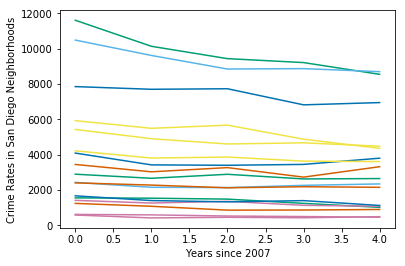

In [309]:
# Graph crime rates throughout years 2007 - 2012 for all San Diego City Neighborhoods
plt.xlabel('Years since 2007')
plt.ylabel('Crime Rates in San Diego Neighborhoods')
_ = plt.plot(crimebread[:][:])


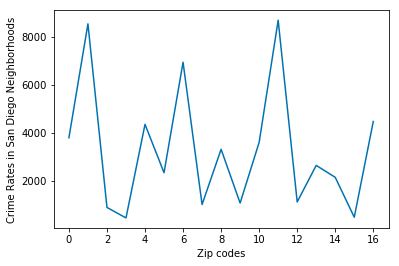

In [310]:
# Graph crime rates in 2012 for all San Diego City Neighborhoods
plt.xlabel('Zip codes')
plt.ylabel('Crime Rates in San Diego Neighborhoods')
_ = plt.plot(crimeslice[:][:])

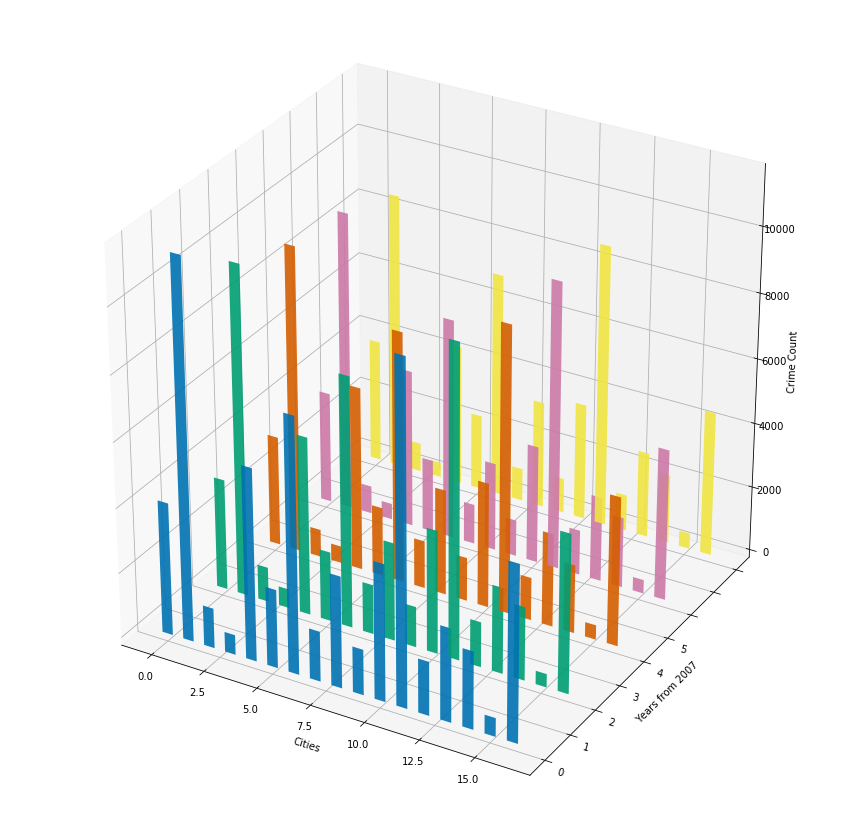

In [311]:
# Graphs the 3D slice of bread

numcr = []
for i in range(len(year_list)):
    numcr.append(list(crimebread3D[i][0][:]))

x = list(crimebread3D[0][1][:])



fig = plt.figure(1, figsize=(15,15))

ax = fig.add_subplot(111, projection='3d')
#['r', 'g', 'b', 'y', 'r', 'g']
idk = [0, 1, 2, 3 , 4, 5]

for c, f in zip(['r', 'g', 'b', 'y', 'r'], [0, 1, 2, 3, 4]):
    xs = x #zipcode
    z = numcr[f]
    ax.bar(xs, z, f, zdir = 'y', alpha = .9, width = .5)

ax.set_xlabel('Cities') 
ax.set_ylabel('Years from 2007') 
ax.set_zlabel('Crime Count') 
#ax.set_yticks([2007, 2008, 2009, 2010, 2011, 2012])
#ax.set_yticklabels()
labels = {}
for l_c in range(0,6):
    labels[l_c] = 'This is not normal'

ax.set_yticklabels(labels, rotation = -15, verticalalignment = 'baseline', horizontalalignment = 'left')
plt.show()



In [313]:
# Sum total number of crimes in San Diego city for each year
year_range = [2008, 2009, 2010, 2011, 2012]
total_2008 = np.sum(crimebread3D[:][0])
total_2009 = np.sum(crimebread3D[:][1])
total_2010 = np.sum(crimebread3D[:][2])
total_2011 = np.sum(crimebread3D[:][3])
total_2012 = np.sum(crimebread3D[:][4])

totalcrime = [total_2008, total_2009, total_2010, total_2011, total_2012]
print(totalcrime)

[67938, 61563, 60053, 56970, 56039]


<Container object of 31 artists>

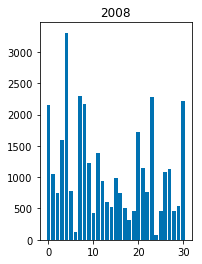

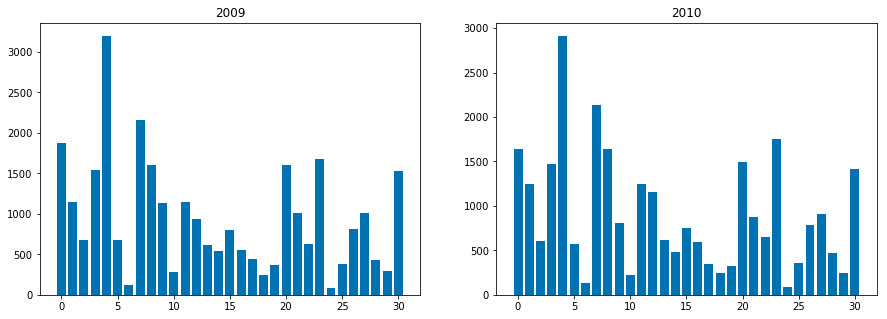

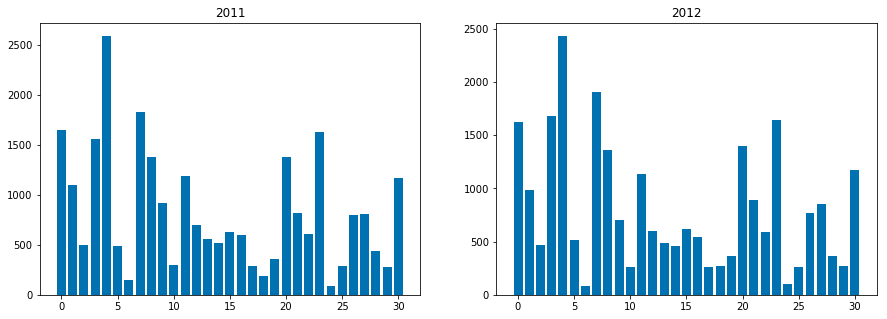

In [31]:
# prices across zipcodes color = each year
plt.xlabel('zipcodes')
plt.ylabel('crime rates in SD neighborhoods')
zipcrime_2008 = []
zipcrime_2009 = []
zipcrime_2010 = []
zipcrime_2011 = []
zipcrime_2012 = []

for j in range(len(crimebread)):
    for i in range(len(crimebread[j])):
        if j == 0:
            zipcrime_2008.append(crimebread[j][i])
        if j == 1:
            zipcrime_2009.append(crimebread[j][i])
        if j == 2:
            zipcrime_2010.append(crimebread[j][i])
        if j == 3:
            zipcrime_2011.append(crimebread[j][i])
        if j == 4:
            zipcrime_2012.append(crimebread[j][i])



plt.subplot(1,2,2)
plt.title(year_list[0])
plt.bar(list(range(31)), zipcrime_2008)

plt.figure(2,figsize=(15,5))
plt.subplot(1,2,1)
plt.title(year_list[1])
plt.bar(list(range(31)), zipcrime_2009)
plt.subplot(1,2,2)
plt.title(year_list[2])
plt.bar(list(range(31)), zipcrime_2010)

plt.figure(3,figsize=(15,5))
plt.subplot(1,2,1)
plt.title(year_list[3])
plt.bar(list(range(31)), zipcrime_2011)
plt.subplot(1,2,2)
plt.title(year_list[4])
plt.bar(list(range(31)), zipcrime_2012)

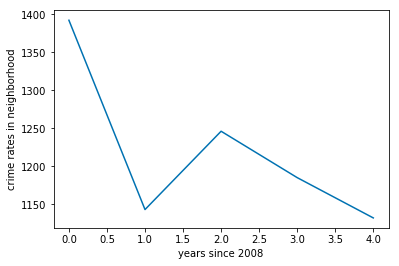

In [32]:

# accessing by each zipcode
plt.xlabel('years since 2008')
plt.ylabel('crime rates in neighborhood')
# color: each zipcode
_ = plt.plot(crimebread.T[:][11]) #La Jolla



In [33]:
# Change of crime rate

# Exporting Data

In [315]:
import matplotlib.pyplot as plt
import h5py

In [35]:
#creating data
#cogs108h5 = h5py.File('cogs108.h5', 'a')
#cogs108h5.create_dataset('crime_rate_5y', data = crimebread )
#cogs108h5.close()

In [36]:
#cogs108h5.close()

In [319]:
#creating data
cogs108h5 = h5py.File('cogs108.h5', 'a')
cogs108h5.create_dataset('county_crime_averages', data = crimebread3D )
cogs108h5.close()



RuntimeError: Unable to create link (Name already exists)

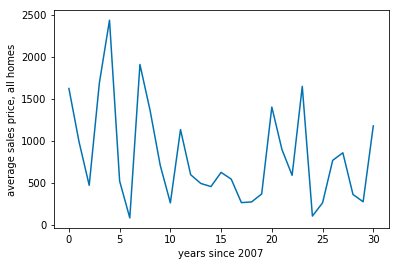

In [39]:
h5_file = 'cogs108.h5'
with h5py.File(h5_file, 'r') as h5:
    # Data from 2012
    dset = h5['crime_rate_2012']
    #_ = plt.plot(dset[:][:])
    plt.xlabel('years since 2007')
    plt.ylabel('average sales price, all homes')
    plt.title('')
    _ = plt.plot(dset[:][:])

In [ ]:
#cogs108h5 = h5py.File('cogs108.h5', 'a')
#cogs108h5.create_dataset('crime_rate_5y_selected', data = crimeslice )
#cogs108h5.close()

In [ ]:
#load data from h5 


In [ ]:
#reading data 2012
#with h5py.File(h5_file, 'r') as h5:
#    dset = h5['crime_rate_5y_all']

In [ ]:
#reading data for selected zip codes in 2012
#with h5py.File(h5_file, 'r') as h5:
#    dset = h5['crime_rate_5y_selected']